# Algoritmos de optimización - Reto 1

Nombre: Antonio Manuel Míguez Vega<br>
Github: https://github.com/ammiguezvega/MIAR<br>

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás. 

In [16]:
# Torres de Hanoi

def hanoi(numdiscos, origen, destino, auxiliar, movimientos=None):
    """
    Resuelve el problema de las Torres de Hanoi usando la técnica de Divide y Vencerás.

    Args:
        numdiscos (int): Número de discos.
        origen (str): Nombre del poste origen.
        destino (str): Nombre del poste destino.
        auxiliar (str): Nombre del poste auxiliar.
        movimientos (list): Lista para almacenar los movimientos (opcional).

    Returns:
        list: Lista de movimientos realizados (si se proporciona la lista movimientos).
    """
    if movimientos is None:
        movimientos = []

    if numdiscos == 1:
        # Caso base: mover un disco directamente
        movimientos.append(f"Mover disco de {origen} a {destino}")
    else:
        # Paso 1: Mover n-1 discos del origen al auxiliar
        hanoi(numdiscos - 1, origen, auxiliar, destino, movimientos)
        # Paso 2: Mover el disco más grande del origen al destino
        movimientos.append(f"Mover disco de {origen} a {destino}")
        # Paso 3: Mover n-1 discos del auxiliar al destino
        hanoi(numdiscos - 1, auxiliar, destino, origen, movimientos)

    return movimientos

# Ejemplo de uso
numero_de_discos = 3
movimientos = hanoi(numero_de_discos, "A", "C", "B")

# Imprimir los movimientos
print(f"Resolviendo Torres de Hanoi con {numero_de_discos} discos:")
for paso, movimiento in enumerate(movimientos, 1):
    print(f"{paso}. {movimiento}")



Resolviendo Torres de Hanoi con 3 discos:
1. Mover disco de A a C
2. Mover disco de A a B
3. Mover disco de C a B
4. Mover disco de A a C
5. Mover disco de B a A
6. Mover disco de B a C
7. Mover disco de A a C


## Sucesión de Fibonacci

Calcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos. 

Usando algoritmo recursivo para n=30: 832040
Usando algoritmo iterativo para n=30: 832040


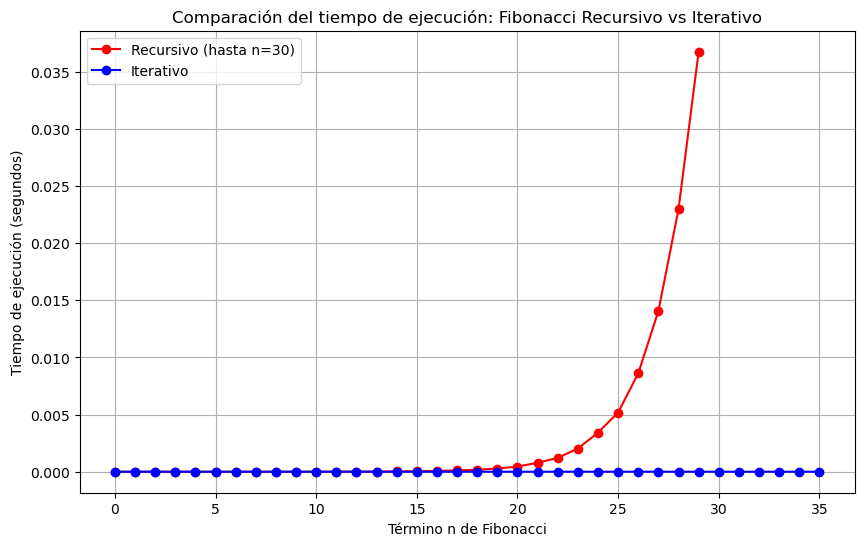

In [29]:
#Sucesión_de_Fibonacci
import time
import matplotlib.pyplot as plt 

def fibonacci_recursive(n):
    """
    Calcula el n-ésimo término de la Sucesión de Fibonacci usando un algoritmo recursivo.

    Args:
        n (int): término de la sucesión.

    Returns:
        int: n-esimo término de la sucesión.
    """
    if n <= 1:
        return n
    return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)

def fibonacci_iterative(n):
    """
    Calcula el n-ésimo término de la Sucesión de Fibonacci usando un algoritmo iterativo.

    Args:
        n (int): término de la sucesión.

    Returns:
        int: n-esimo término de la sucesión.
    """
    if n <= 1:
        return n
    a, b = 0, 1
    for _ in range(2, n + 1):
        a, b = b, a + b
    return b


print(f'Usando algoritmo recursivo para n=30: {fibonacci_recursive(30)}')
print(f'Usando algoritmo iterativo para n=30: {fibonacci_iterative(30)}')

# Medición del tiempo de ejecución
def measure_execution_time(max_n):
    recursive_times = []
    iterative_times = []
    ns = list(range(max_n + 1))

    for n in ns:
        # Tiempo para el método recursivo
        if n < 30:  # Limitar recursivo por eficiencia
            start = time.time()
            fibonacci_recursive(n)
            end = time.time()
            recursive_times.append(end - start)
        else:
            recursive_times.append(None)  # No se calcula para valores altos
        
        # Tiempo para el método iterativo
        start = time.time()
        fibonacci_iterative(n)
        end = time.time()
        iterative_times.append(end - start)

    return ns, recursive_times, iterative_times

# Parámetro máximo
max_n = 35  # Hasta dónde calcular
ns, recursive_times, iterative_times = measure_execution_time(max_n)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(ns[:30], [t for t in recursive_times if t is not None], label="Recursivo (hasta n=30)", marker="o", color='red')
plt.plot(ns, iterative_times, label="Iterativo", marker="o", color='blue')
plt.xlabel("Término n de Fibonacci")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Comparación del tiempo de ejecución: Fibonacci Recursivo vs Iterativo")
plt.legend()
plt.grid()
plt.show()

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [33]:
# Problema del cambio de moneda

def cambio_moneda_greedy(valor, monedas):
    """
    Resuelve el problema de cambio de moneda utilizando un enfoque voraz.

    Args:
        valor (int): Valor objetivo a alcanzar.
        monedas (list): Lista de denominaciones de monedas disponibles.

    Returns:
        dict: Diccionario con las denominaciones usadas y la cantidad de cada una.
    """

    # Ordenar las monedas en orden descendente
    monedas = sorted(monedas, reverse=True)

    resultado = {}
    for moneda in monedas:
        if valor == 0:
            break
        cantidad = valor // moneda
        if cantidad > 0:
            resultado[moneda] = cantidad
        valor %= moneda
    return resultado

# Ejemplo de uso
valor_objetivo = 67
denominaciones = [50, 20, 10, 5, 2, 1]  # Denominaciones de monedas

resultado = cambio_moneda_greedy(valor_objetivo, denominaciones)

print(f"Cambio para {valor_objetivo} con monedas {denominaciones}:")
for moneda, cantidad in resultado.items():
    print(f"- {cantidad} moneda(s) de {moneda}")


Cambio para 67 con monedas [50, 20, 10, 5, 2, 1]:
- 1 moneda(s) de 50
- 1 moneda(s) de 10
- 1 moneda(s) de 5
- 1 moneda(s) de 2


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

Se encontraron 2 soluciones para un tablero de 4x4.
Representación de la primera solución encontrada:
Solución 1:


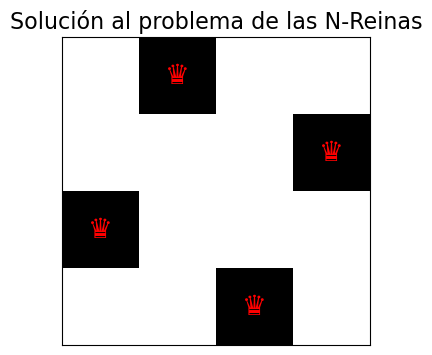

Solución 2:


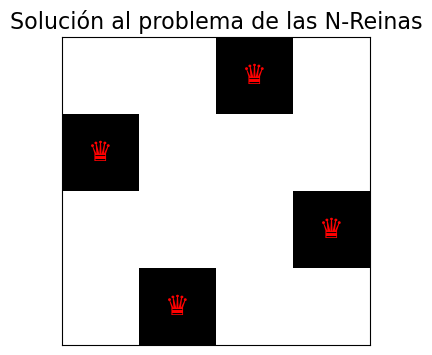

In [52]:
# Problema de las N-Reinas
import matplotlib.pyplot as plt
import numpy as np

def es_seguro(tablero, fila, columna, n):
    """
    Verifica si es seguro colocar una reina en la posición (fila, columna).

    Args:
        fila (int): Fila de la posición a verificar.
        columna (int): Columna de la posición a verificar.
        tablero (list): Lista con las posiciones de las reinas.
        n (int): Número de reinas.

    Returns:
        bool: True si es seguro, False en caso contrario.
    """
    # Verificar la columna
    for i in range(fila):
        if tablero[i] == columna:
            return False

    # Verificar la diagonal superior izquierda
    for i, j in zip(range(fila, -1, -1), range(columna, -1, -1)):
        if tablero[i] == j:
            return False

    # Verificar la diagonal superior derecha
    for i, j in zip(range(fila, -1, -1), range(columna, n)):
        if tablero[i] == j:
            return False

    return True

def resolver_n_reinas(tablero, fila, n, soluciones):
    """
    Resuelve el problema de las N-Reinas utilizando backtracking.

    Args:
        tablero (list): Lista con las posiciones de las reinas.
        fila (int): Fila actual.
        n (int): Número de reinas.
        soluciones (list): Lista para almacenar las soluciones.

    Returns:
        list: Lista de soluciones encontradas.
    """
    if fila == n:
        # Convertir la solución en formato legible
        solucion = []
        for i in range(n):
            fila = ["."] * n
            fila[tablero[i]] = "Q"
            solucion.append("".join(fila))
        soluciones.append(solucion)
        return

    for columna in range(n):
        if es_seguro(tablero, fila, columna, n):
            tablero[fila] = columna
            resolver_n_reinas(tablero, fila + 1, n, soluciones)
            tablero[fila] = -1  # Retroceder

def n_reinas(n):
    """
    Encuentra todas las soluciones para el problema de las N-Reinas.
    
    Args:
        n (int): Número de reinas.
    
    Returns:
        list: Lista de soluciones encontradas.
    """
    tablero = [-1] * n
    soluciones = []
    resolver_n_reinas(tablero, 0, n, soluciones)
    return soluciones

# Función para visualizar una solución
def visualizar_solucion(solucion):
    """
    Visualiza una solución del problema de las N-Reinas en un tablero de ajedrez.

    Args:
        solucion (list): Solución al problema de las N-Reinas.

    Returns:
        None
    """
    n = len(solucion)
    tablero = np.zeros((n, n))

    # Colocar las reinas en el tablero
    for i, fila in enumerate(solucion):
        columna = fila.index("Q")
        tablero[i, columna] = 1

    # Crear la figura del tablero
    fig, ax = plt.subplots(figsize=(n, n))
    ax.matshow(tablero, cmap="binary")

    # Añadir las reinas y el diseño del tablero
    for i in range(n):
        for j in range(n):
            if tablero[i, j] == 1:
                ax.text(j, i, "♛", va='center', ha='center', fontsize=20, color="red")
            else:
                color = "black" if (i + j) % 2 == 0 else "white"
                ax.text(j, i, "", va='center', ha='center', fontsize=20, color=color)

    ax.set_xticks([])
    ax.set_yticks([])
    plt.title("Solución al problema de las N-Reinas", fontsize=16)
    plt.show()

# Ejemplo de uso
n = 4
soluciones = n_reinas(n)

print(f"Se encontraron {len(soluciones)} soluciones para un tablero de {n}x{n}.")
print(f"Representación de la primera solución encontrada:")

# Visualizar las soluciones
for i, solucion in enumerate(soluciones, 1):
    print(f"Solución {i}:")
    visualizar_solucion(solucion)

